 
#### Seaborn
is based on Matplotlib and helps create statistical graphic summaries and has some built-in datasets
It is much easier than matplotlib as sns doesn't require adjustments to make better graph; it is already perfect
#### Outliers Detection using Statistics
 When distribution looks  normal, we can use mean and std to estimate the p of ourdata to fall in specific ranges.
68% data falls in mean +/- One standard deviation.
95% data falls in mean +/- Two standard deviation.
99.7% data falls in mean +/- Three standard deviation. Thus we can use mean +/ standard deviation as the boundary of normal data.    
Any data falls out of this boundary is consisdered an OUTLIER.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#So many things to ask in this question. Of them are; Is there a relationship between:
# amount to pay and the tip, tip and the sex, tip and the time of meal, tip vs smoker(y/n)

tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [60]:
tips.shape

(244, 7)

In [61]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### EDA
##### Relational Plots - How attributes are related to each other

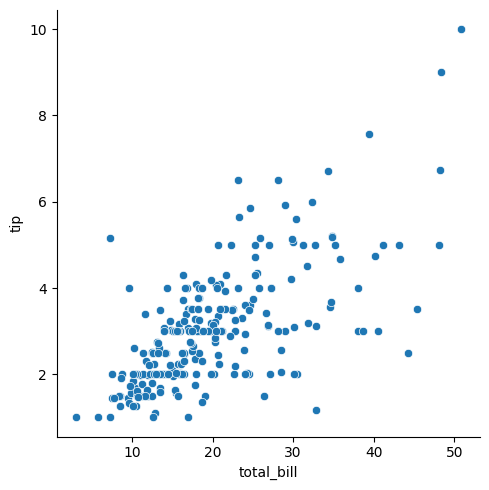

In [62]:
sns.relplot(data = tips, x = 'total_bill', y= 'tip')

# you can see more tips in between 10 to 35 bills. no/less tips in more bills and bills less than 10

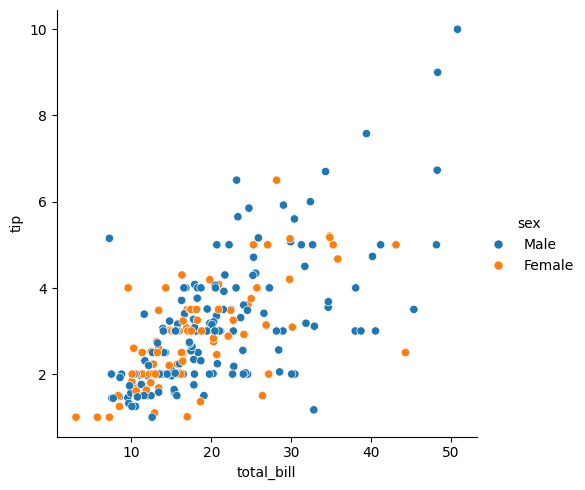

In [63]:
# adding extra argument in the plot

sns.relplot(data = tips, x = 'total_bill', y= 'tip', hue = "sex")

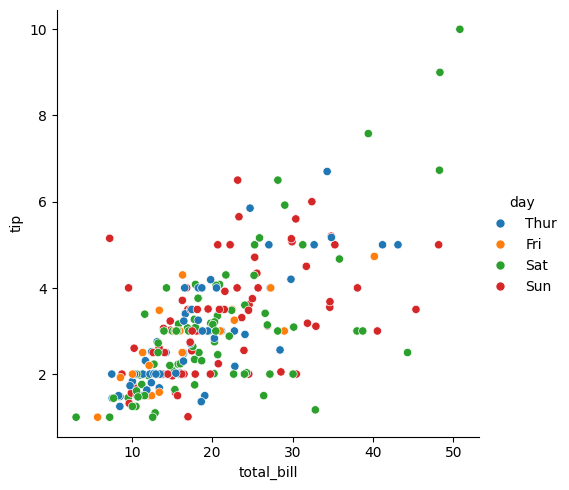

In [64]:
sns.relplot(data = tips, x = 'total_bill', y= 'tip', hue = 'day')

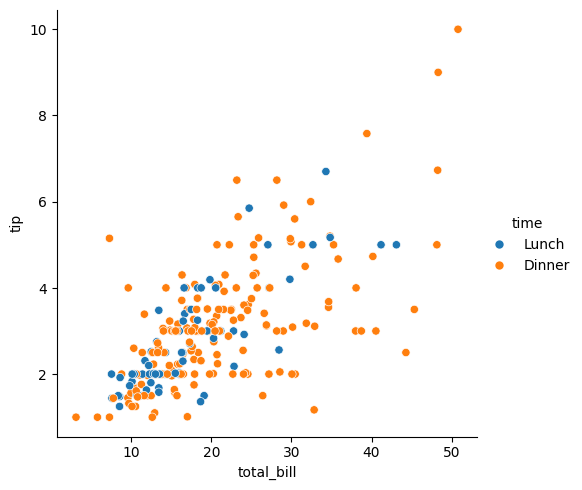

In [65]:
sns.relplot(data = tips, x = 'total_bill', y= 'tip', hue = 'time')

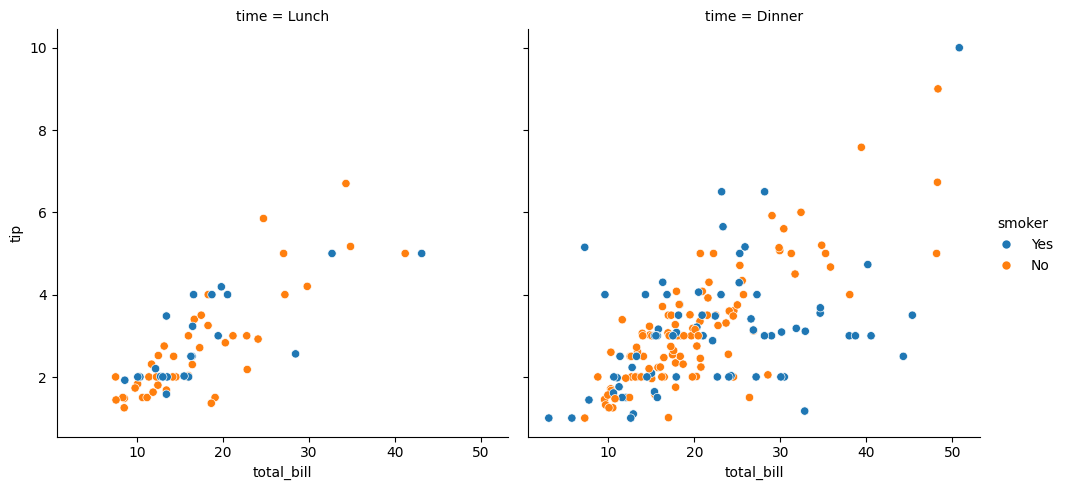

In [66]:
# Graph split by time of meal

sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time')

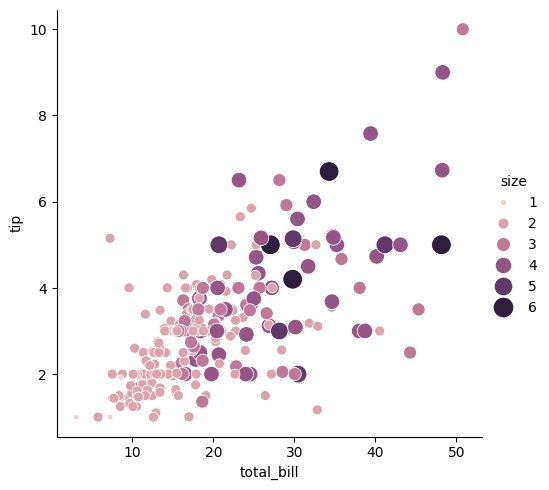

In [67]:
# Modified size

sns.relplot(data = tips, x = 'total_bill', y = 'tip', size = 'size', sizes = (15,200),  hue = 'size')

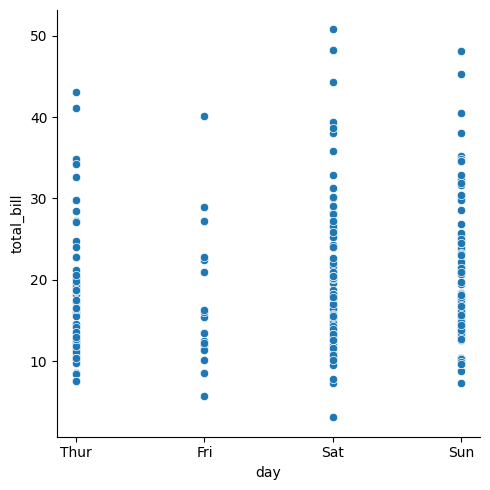

In [68]:
#when x is a categorical variable
sns.relplot(data = tips, x = 'day', y = 'total_bill')

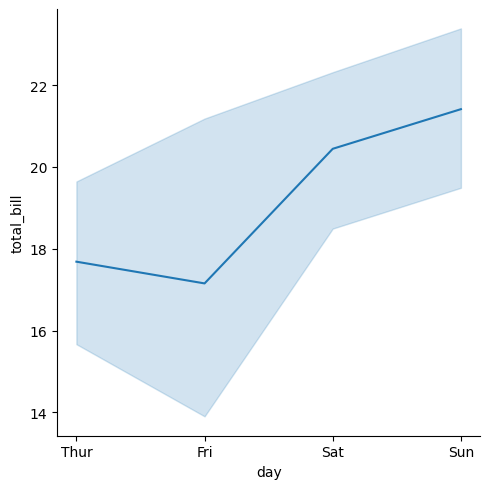

In [69]:
# Line will be more meaningful than the above graph
sns.relplot(data = tips, x = 'day', y = 'total_bill', kind = 'line')

# The infliction points of the line show the mean of bills by day
# the overall big shade means the 95% critical interval for a typical day

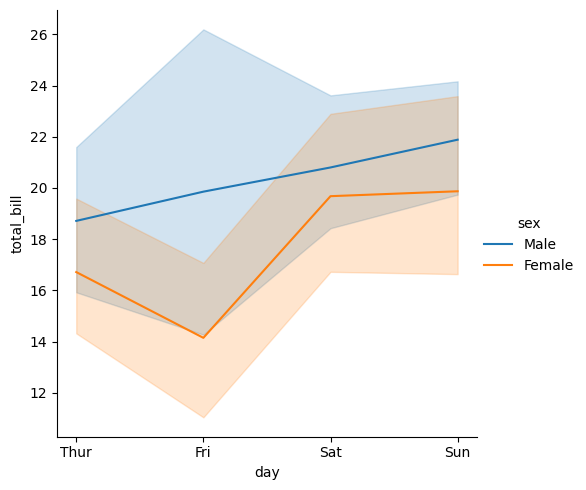

In [70]:
sns.relplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex',  kind = 'line')


# We can see here different mean and distribution for male vs female bills

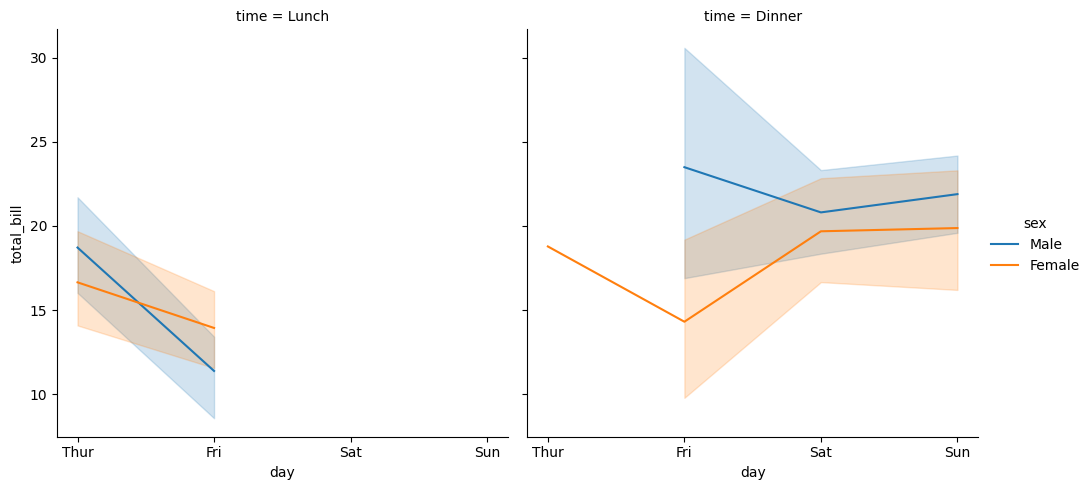

In [71]:
#Comparing the meal time
sns.relplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex',  kind = 'line', col = 'time')

#### Checking distributions

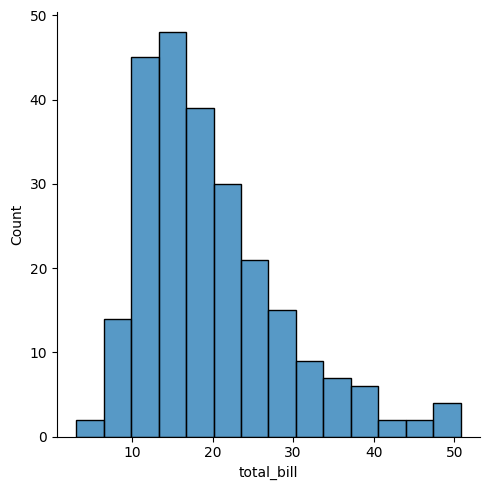

In [72]:
sns.displot(data = tips, x = 'total_bill')

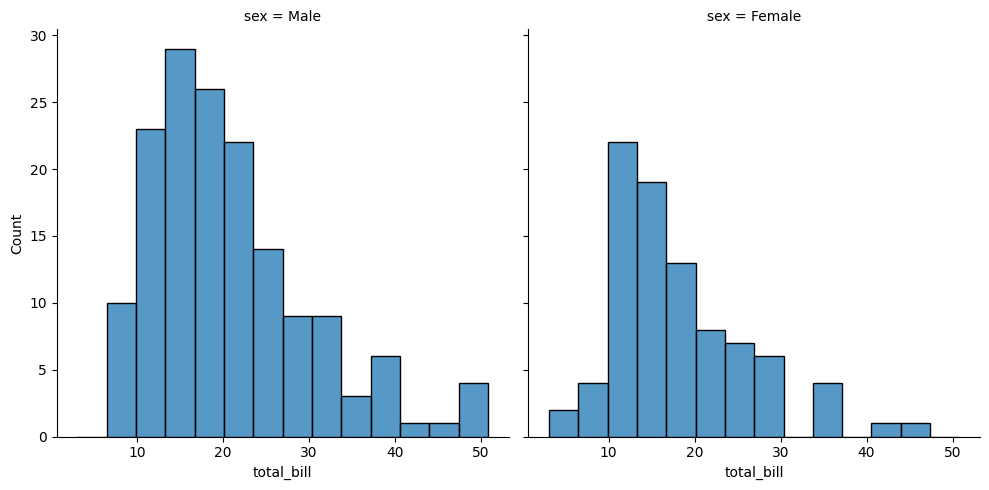

In [73]:
# different distribution and mean for male vs female 
sns.displot(data = tips, x = 'total_bill', col = 'sex')

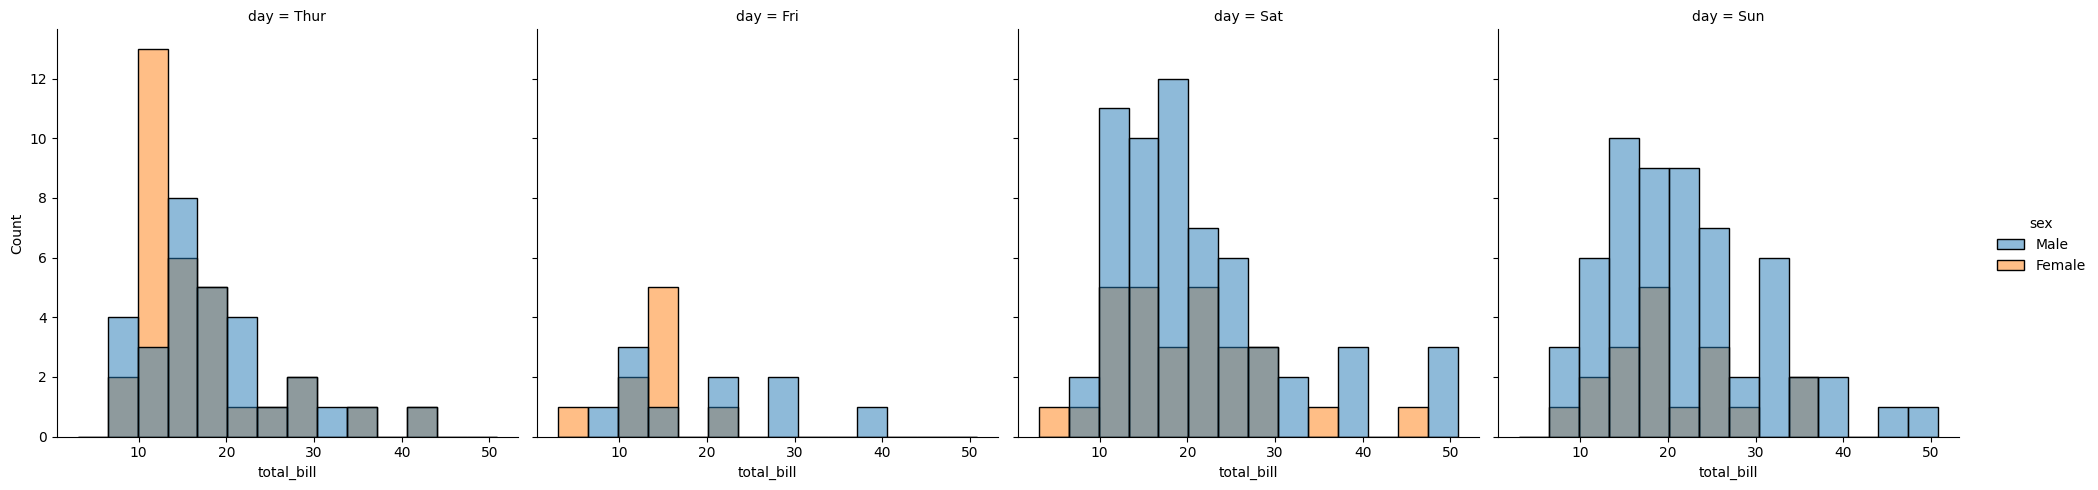

In [74]:
sns.displot(data = tips, x = 'total_bill', hue = 'sex', col = 'day')

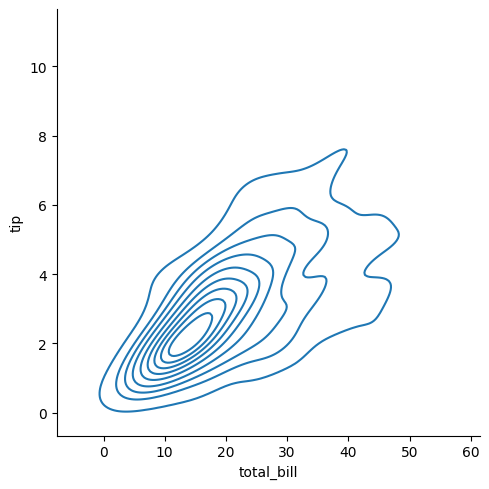

In [75]:
sns.displot(data = tips, x = 'total_bill', y = 'tip', kind = 'kde')

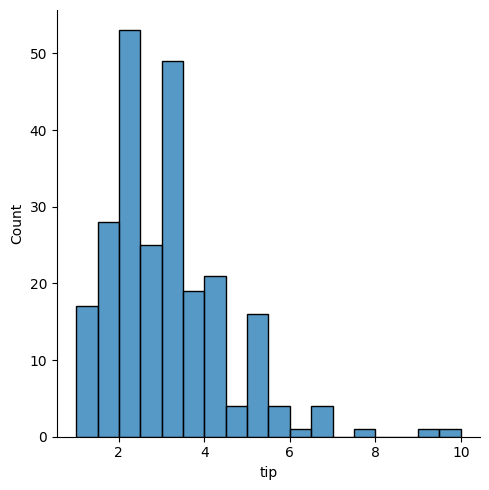

In [76]:
sns.displot(data = tips, x = 'tip')

<Axes: >

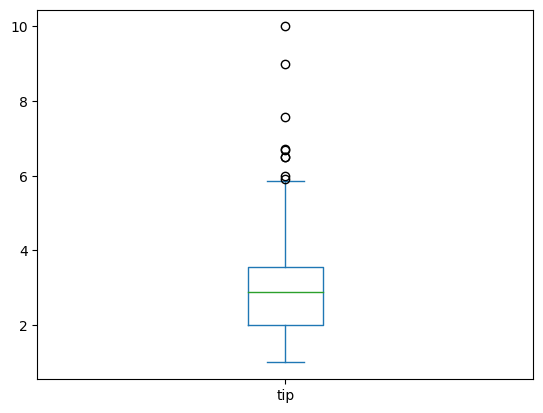

In [77]:
tips['tip'].plot(kind= 'box')

#### Detecting outliers from the tip using Mean and Standard deviation

In [78]:
df = tips
df[(df['tip']< (df['tip'].mean() - 3* df['tip'].std())) |
(df['tip'] > (df['tip'].mean() + 3 * df['tip'].std()))]
   
# This below detected the data points outside or away 3 std from the mean             
                

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


#### Let's remove the above three outlier data points

In [79]:
df.drop((df[(df['tip']< (df['tip'].mean() - 3* df['tip'].std())) |
(df['tip'] > (df['tip'].mean() + 3 * df['tip'].std()))]).index, inplace = True)

<Axes: >

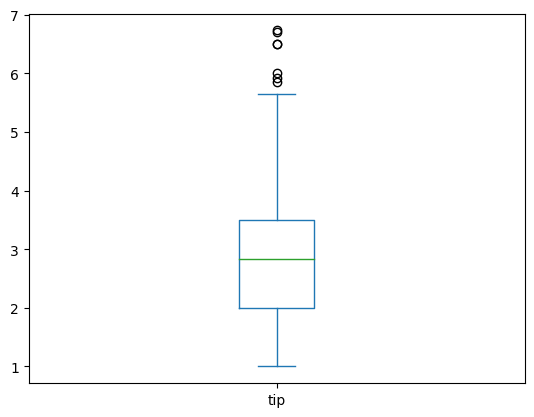

In [80]:
df['tip'].plot(kind= 'box')

 #### We can still still small outliers above 6 so we could also remove them by expanding the scope to a 2 std away from the mean to get a clean box chart

In [81]:
df.drop((df[(df['tip']< (df['tip'].mean() - 2* df['tip'].std())) |
(df['tip'] > (df['tip'].mean() + 2 * df['tip'].std()))]).index, inplace = True)

<Axes: >

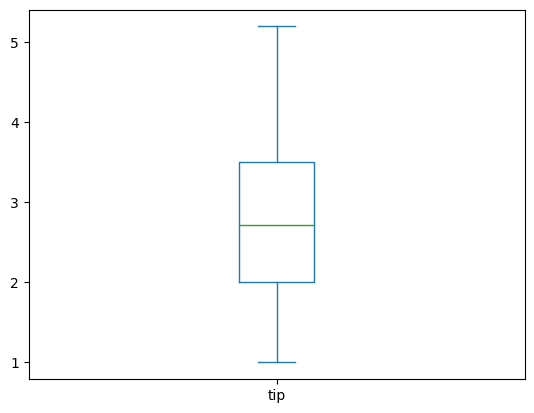

In [82]:
df['tip'].plot(kind= 'box')

# the BOX uses, IQR which is little bit different the mean and std above results

##### Renaming the Female and Male values to F and M; just for fun

In [83]:
df['sex'].value_counts()

sex
Male      146
Female     86
Name: count, dtype: int64

In [84]:
df['sex'].replace({
    "Female":"F",
    "Male":"M"
}, inplace = True)

In [85]:
df['sex'].value_counts()

sex
M    146
F     86
Name: count, dtype: int64

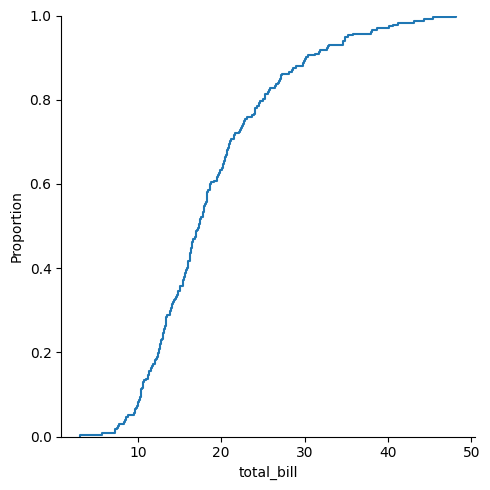

In [86]:
sns.displot(data = df, x = 'total_bill',  kind = 'ecdf')

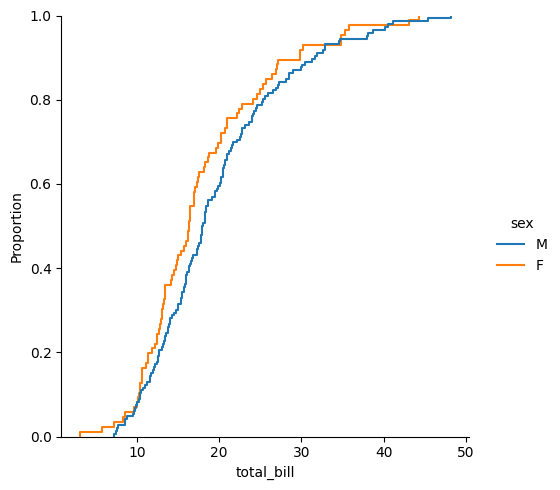

In [87]:
sns.displot(data = df, x = 'total_bill',  kind = 'ecdf', hue = 'sex')